<a href="https://colab.research.google.com/github/GiX7000/deep-learning-with-tensorflow/blob/main/deep_learning_with_tensorflow_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with TensorFlow with Laurence Moroney, Part3

## Example 1. Introduction to Time Series.

What exactly is a time series? It's typically defined as an ordered sequence of values that are usually equally spaced over time. If there is a single value at each time step, the term univariate is used to describe them. We may also encounter time series that have multiple values at each time step(Multivariate Time Series).

What types of things can we do with machine learning over time series?
1) Forecastig,
2) Data imputation,
3) Anomalies detection.

Common patterns in time: A) Stationary time series: 1) trends, 2) seasonality, 3) white noise, 4) autocorrelated and 5) combinations of all the previous patterns and B) Non-stationary time series.

A machine-learning model is designed to spot patterns, and when we spot patterns we can make predictions. For the most part this can also work with time series except for the noise which is unpredictable. In machine learning, we always assume that more data is better. But for time series forecasting it really depends on the time series and more data may not help(for exampe if we have non stationary time series).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_series(time, series, format="-", start=0, end=None, label=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      label (list of strings)- tag for the line
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Plot the time series data
    plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    if label:
      plt.legend(fontsize=14, labels=label)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

Trend Time Series.

In [ ]:
def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

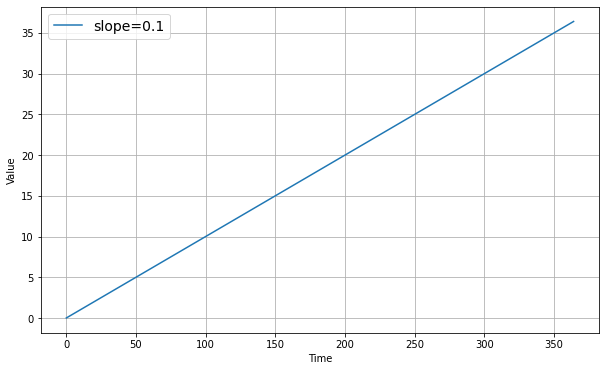

In [ ]:
# Generate time steps. Assume 1 per day for one year (365 days)
time = np.arange(365)

# Define the slope (You can revise this)
slope = 0.1

# Generate measurements with the defined slope
series = trend(time, slope)

# Plot the results
plot_series(time, series, label=[f'slope={slope}'])

Seasonal Time Series.

In [ ]:
def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

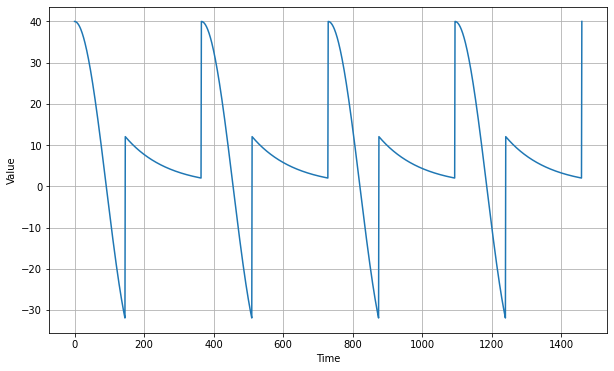

In [ ]:
# data generated every 365 time steps

# Generate time steps
time = np.arange(4 * 365 + 1)

# Define the parameters of the seasonal data
period = 365
amplitude = 40

# Generate the seasonal data
series = seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

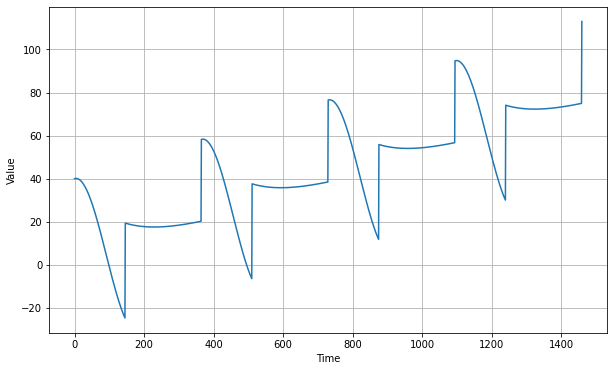

In [ ]:
# a seasonal pattern with an upward trend

# Define seasonal parameters
slope = 0.05
period = 365
amplitude = 40

# Generate the data
series = trend(time, slope) + seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

Time Series with Noise.

In practice, few real-life time series have such a smooth signal. They usually have some noise riding over that signal.

In [ ]:
def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal

    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

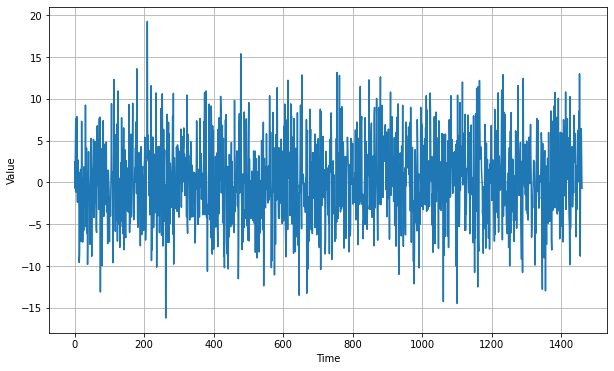

In [ ]:
# Define noise level
noise_level = 5

# Generate noisy signal
noise_signal = noise(time, noise_level=noise_level, seed=42)

# Plot the results
plot_series(time, noise_signal)

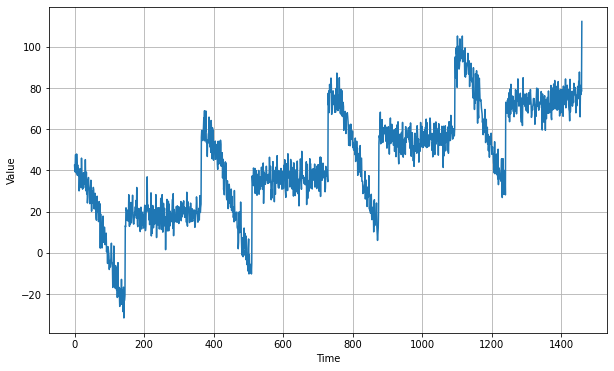

In [ ]:
# let's add this to the time series we generated earlier

# Add the noise to the time series
series += noise_signal

# Plot the results
plot_series(time, series)

Time Series with Autocorrelation.

Time series can also be autocorrelated. This means that measurements at a given time step is a function of previous time steps. Here are some functions that demonstrate that. Notice lines that refer to the step variable because this is where the computation from previous time steps happen. It will also include noise (i.e. random numbers) to make the result a bit more realistic.

In [ ]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - autocorrelated data
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)
    
    # Initialize array of random numbers equal to the length 
    # of the given time steps plus 50
    ar = rnd.randn(len(time) + 50)
    
    # Set first 50 elements to a constant
    ar[:50] = 100
    
    # Define scaling factors
    phi1 = 0.5
    phi2 = -0.1

    # Autocorrelate element 51 onwards with the measurement at 
    # (t-50) and (t-30), where t is the current time step
    for step in range(50, len(time) + 50):
        ar[step] += phi1 * ar[step - 50]
        ar[step] += phi2 * ar[step - 33]
    
    # Get the autocorrelated data and scale with the given amplitude.
    # The first 50 elements of the original array is truncated because
    # those are just constant and not autocorrelated.
    ar = ar[50:] * amplitude

    return ar

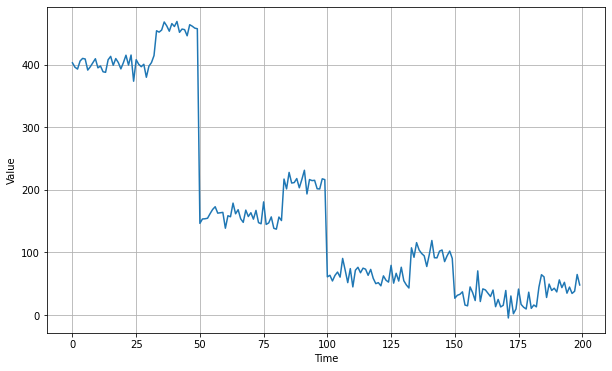

In [ ]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the first 200 elements to see the pattern more clearly
plot_series(time[:200], series[:200])

In [ ]:
# Here is a more straightforward autocorrelation function which just computes a value from the previous time step

def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)

    # Initialize array of random numbers equal to the length 
    # of the given time steps plus an additional step
    ar = rnd.randn(len(time) + 1)

    # Define scaling factor
    phi = 0.8

    # Autocorrelate element 11 onwards with the measurement at 
    # (t-1), where t is the current time step
    for step in range(1, len(time) + 1):
        ar[step] += phi * ar[step - 1]
    
    # Get the autocorrelated data and scale with the given amplitude.
    ar = ar[1:] * amplitude
    
    return ar

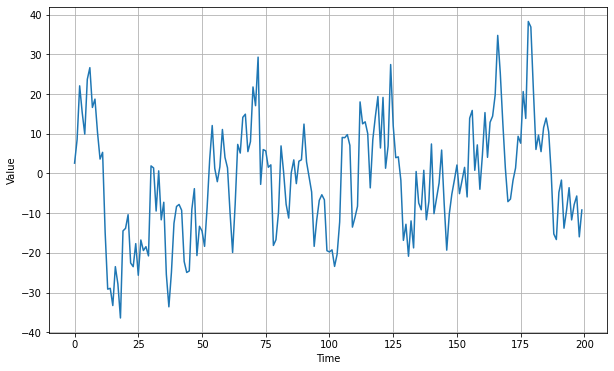

In [ ]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the results
plot_series(time[:200], series[:200])

In [ ]:
# Another autocorrelated time series you might encounter is one where it decays predictably after random spikes

def impulses(time, num_impulses, amplitude=1, seed=None):
    """
    Generates random impulses

    Args:
      time (array of int) - contains the time steps
      num_impulses (int) - number of impulses to generate
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      series (array of float) - array containing the impulses
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)

    # Generate random numbers
    impulse_indices = rnd.randint(len(time), size=num_impulses)

    # Initialize series
    series = np.zeros(len(time))

    # Insert random impulses
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude

    return series

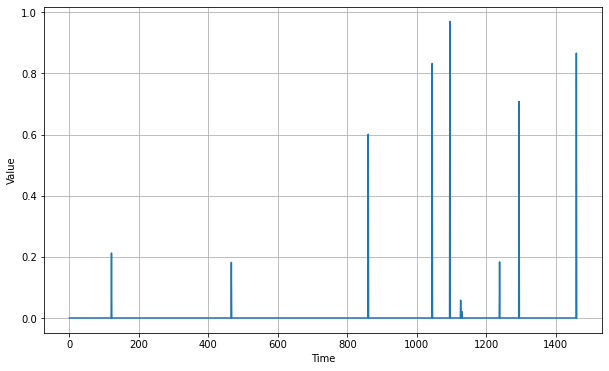

In [ ]:
# Generate random impulses
impulses_signal = impulses(time, num_impulses=10, seed=42)

# Plot the results
plot_series(time, impulses_signal)

In [ ]:
# Now that you have the series, you will next define the function that will decay the next values after it spikes

def autocorrelation_impulses(source, phis):
    """
    Generates autocorrelated data from impulses

    Args:
      source (array of float) - contains the time steps with impulses
      phis (dict) - dictionary containing the lag time and decay rates

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Copy the source
    ar = source.copy()

    # Compute new series values based on the lag times and decay rates
    for step, value in enumerate(source):
        for lag, phi in phis.items():
            if step - lag > 0:
              ar[step] += phi * ar[step - lag]

    return ar

Here is one example that generates the next value from the previous time step (i.e. t-1, where t is the current time step):

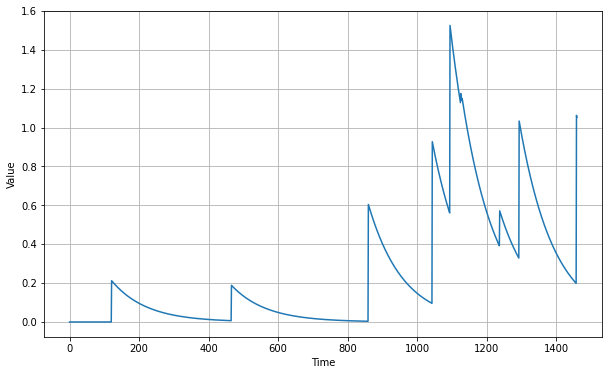

In [ ]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.99})

# Plot the results
plot_series(time, series)

Here is another example where the next values are computed from those in t-1 and t-50:

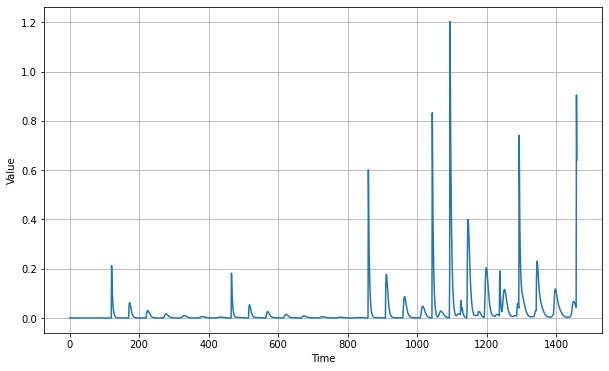

In [ ]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.70, 50: 0.2})

# Plot the results
plot_series(time, series)

Autocorrelated data can also ride a trend line and it will look like below.

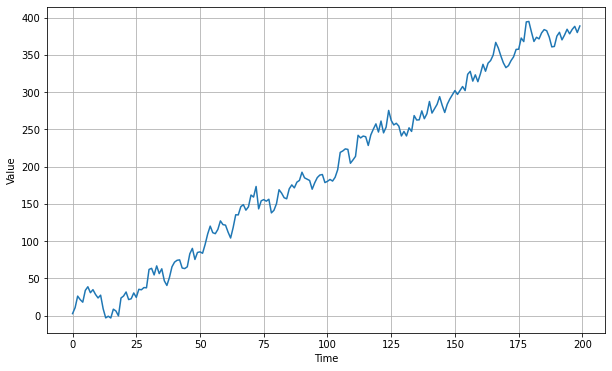

In [ ]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])

Similarly, seasonality can also be added to this data.

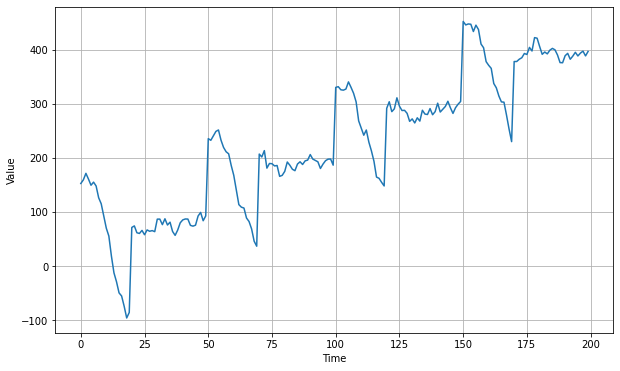

In [ ]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])

Non-stationary Time Series: it is also possible for the time series to break an expected pattern. Big events can alter the trend or seasonal behavior of the data. It would look something like below where the graph shifted to a downward trend at time step = 200.

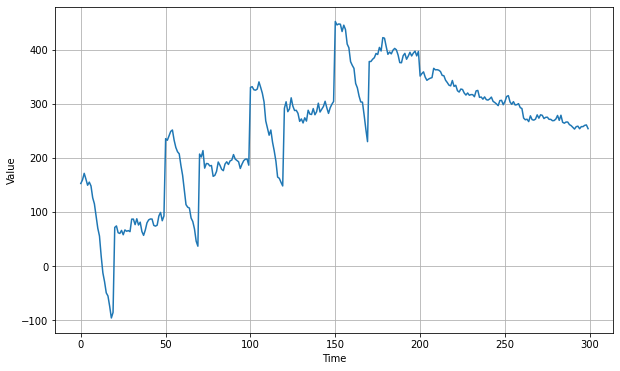

In [ ]:
# Generate data with positive trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Generate data with negative trend
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550

# Splice the downward trending data into the first one at time step = 200
series[200:] = series2[200:]

# Plot the result
plot_series(time[:300], series[:300])

## Example 2. Statistical Forecasting of Time Series.

naive forecasting: take the last value and assume that the next value will be the same one.

How do you measure performance? To measure the performance of our forecasting model, we typically want to split the time series into a training period, a validation period and a test period. This is called fixed partitioning. If the time series has some seasonality, you generally want to ensure that each period contains a whole number of seasons. For example, one year, or two years, or three years, if the time series has a yearly seasonality.

Roll-forward partitioning: we start with a short training period, and we gradually increase it, say by one day at a time, or by one week at a time. At each iteration, we train the model on a training period. And we use it to forecast the following day, or the following week, in the validation period. You could see it as doing fixed partitioning a number of times, and then continually refining the model as such.

Metrics for evaluating performance: 1) errors=forecasts - actual, 2) mse=np.sqare(errors).mean(), 3) rmse=np.sqrt(mse), 4) np.abs(errors).mean(), 5) mape=np.abs(errors/x_valid).mean().

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# all functions for patterns and plots

def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()


def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

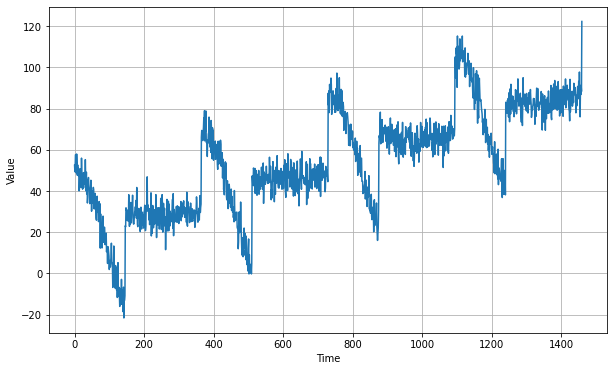

In [ ]:
# Generate synthetic data

# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

In [ ]:
# Split the dataset

# Define the split time
split_time = 1000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

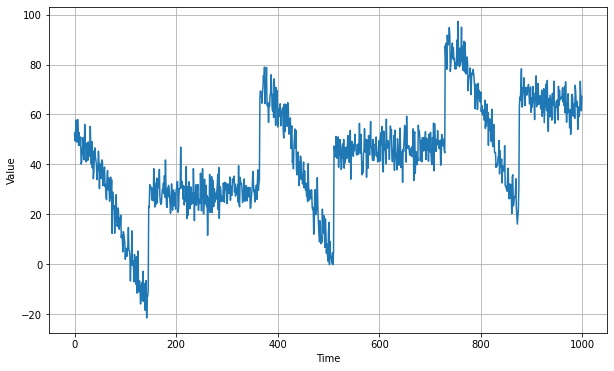

In [ ]:
# Plot the train set
plot_series(time_train, x_train)

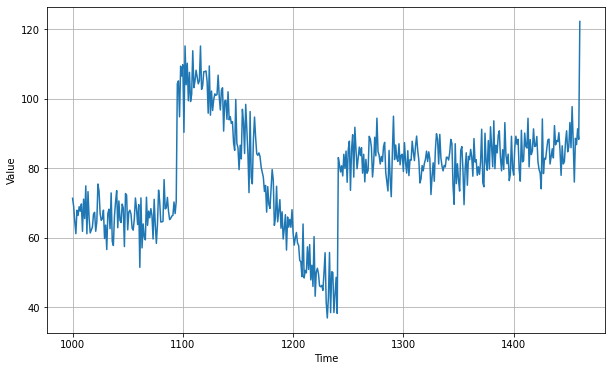

In [ ]:
# Plot the validation set
plot_series(time_valid, x_valid)

Naive Forecast.

In [ ]:
# assume that the next value will be the same as the previous time step
# you can slice the original series like below and print some values as a sanity check
# the next time step value should be identical to the ground truth at the previous time step

# Generate the naive forecast
naive_forecast = series[split_time - 1:-1]

# Define time step
time_step = 100

# Print values
print(f'ground truth at time step {time_step}: {x_valid[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step + 1]}')  # The first super simple prediction is to just predict the value at time period plus one

ground truth at time step 100: 109.84197998046875
prediction at time step 101: 109.84197998046875


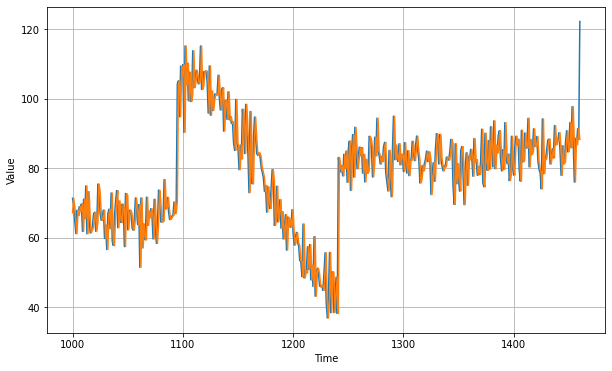

In [ ]:
# Plot the results->see the original series in blue and the predicted one in orange
plot_series(time_valid, (x_valid, naive_forecast))

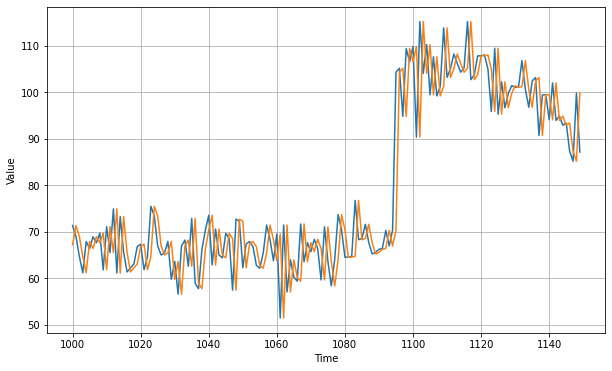

In [ ]:
# Zooming in
plot_series(time_valid, (x_valid, naive_forecast), start=0, end=150)

In [ ]:
# computing metrics: mse and mae
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

61.827534
5.937908


The values above will be our baseline and we will see if we can use other methods to do better than naive forecasting.

Moving Average.

One technique you can use is to do a moving average. This sums up a series of time steps and the average will be the prediction for the next time step. For example, the average of the measurements at time steps 1 to 10 will be the forecast for time step 11, then the average for time steps 2 to 11 will be the forecast for time step 12, and so on.

In [ ]:
def moving_average_forecast(series, window_size):
    """Generates a moving average forecast

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to compute the average for

    Returns:
      forecast (array of float) - the moving average forecast
    """

    # Initialize a list
    forecast = []
    
    # Compute the moving average based on the window size
    for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())
    
    # Convert to a numpy array
    forecast = np.array(forecast)

    return forecast

In this case, the point in time t will be average of the 30 points prior to it.

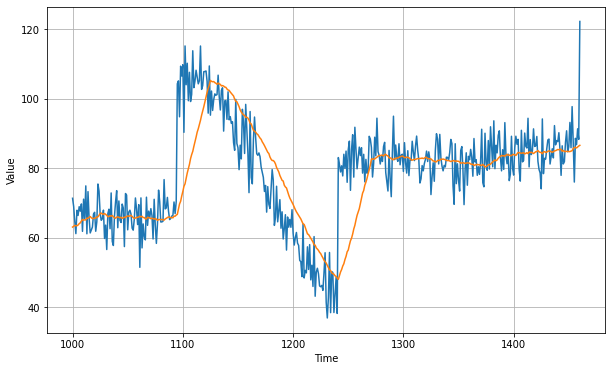

In [ ]:
# generate the forecast with a window size of 30

# Generate the moving average forecast
moving_avg = moving_average_forecast(series, 30)[split_time - 30:]

# Plot the results
plot_series(time_valid, (x_valid, moving_avg))

In [ ]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

106.674576
7.142419


That's worse than naive forecast, as we get values higher than those for the naive prediction! The moving average does not anticipate trend or seasonality. In particular, those huge spikes in the original series causes big deviations as shown in the plot above. We will try to remove these characteristics of the dataset with time differencing and see if we get better results.

Differencing.

Since the seasonality on this Data is one year or 365 days, let's take a look at the difference between the data at time t and the data from 365 days before that.  When we plot that, we can see that the seasonality is gone and we're looking at the raw data plus the noise.

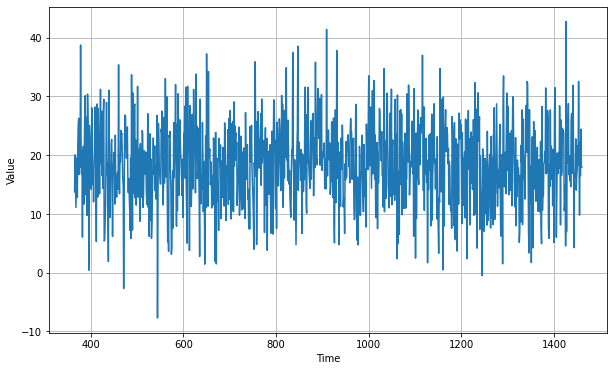

In [ ]:
# Subtract the values at t-365 from original series
diff_series = (series[365:] - series[:-365])

# Truncate the first 365 time steps
diff_time = time[365:]

# Plot the results
plot_series(diff_time, diff_series)

The trend and seasonality seem to be gone so now you can retry using the moving average. We'll see a relatively smooth moving average not impacted by seasonality:

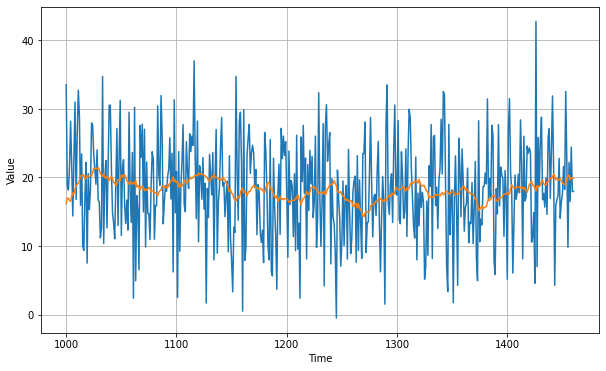

In [ ]:
# Generate moving average from the time differenced dataset
diff_moving_avg = moving_average_forecast(diff_series, 30)

# Slice the prediction points that corresponds to the validation set time steps
diff_moving_avg = diff_moving_avg[split_time - 365 - 30:]

# Slice the ground truth points that corresponds to the validation set time steps
diff_series = diff_series[split_time - 365:]

# Plot the results
plot_series(time_valid, (diff_series, diff_moving_avg))

Now you will bring bring back the trend and seasonality by adding the past values from t – 365. We'll start to see a pretty good prediction. The orange line(predicted) is quite close to the blue one.

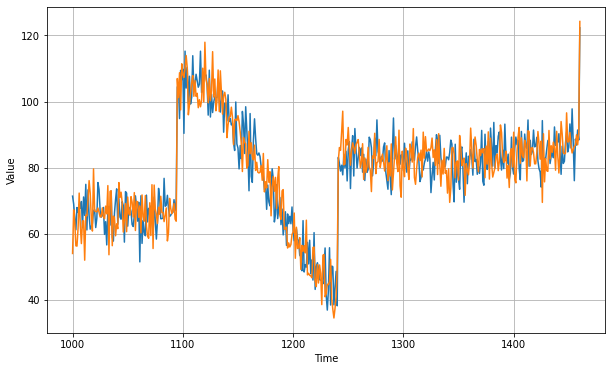

In [ ]:
# Add the trend and seasonality from the original series
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_past))

In [ ]:
# and compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

53.764587
5.9032416


It is a bit better than naive forecast. However, the forecasts look a bit too random because you're adding past values which are already noisy. Remember that the time differenced signal is also noisy so adding these raw past values can compound this problem. To remedy that, you can use a moving averaging on past values to smooth out some of this noise.

But all we did was just add in the raw historic values which are very noisy. What if, instead, we added in the moving average of the historic values, so we're effectively using two different moving averages? Now, our prediction curve is a lot less noisy and the predictions are looking pretty good. If we measure their overall error, the numbers agree with our visual inspection, the error rate has improved further:

Smoothing.

You can use the same moving_average_forecast() function to smooth out past values before adding them back to the time differenced moving average. There are two ways to do this:

1. Trailing windows - This refers to getting the mean of past values to smooth out the value at the current time step. For example, getting the average of t=0 to t=6 to get the smoothed data point at t=6.

2. Centered windows - This refers to getting the mean of past and future values to smooth out the value at the current time step. For example, getting the average of t=0 to t=6 to get the smoothed data point at t=3.

The code below will use the centered windows approach and you will notice it in the slicing of the series array. It is shifted by 370 steps and the window size is 11. To get the smooth data point at t=1000 (i.e. start of the validation set), it will average the measurements at t=995 to t=1005.

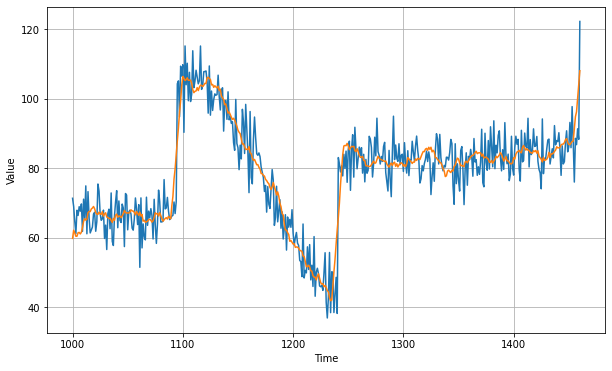

In [ ]:
# Smooth the original series before adding the time differenced moving average
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-359], 11) + diff_moving_avg

# Plot the results
plot_series(time_valid, (x_valid, diff_moving_avg_plus_smooth_past))

The metrics will show a big improvement over the previous output.

In [ ]:
 # Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

34.315723
4.6053295


## Example 3. Preparing Time Series Features and Labels.

I wish I could tune my own learning rate sometimes !!

In [ ]:
import tensorflow as tf

# create a simple dataset

# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Preview the result
for val in dataset:
   print(val.numpy())

0
1
2
3
4
5
6
7
8
9


In [ ]:
# expand our data using windowing

# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data
dataset = dataset.window(size=5, shift=1) # parameters are the size of the window and how much we want to shift by each time

# Print the result
for window_dataset in dataset:
  print(window_dataset)

<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
<_VariantDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>


In [ ]:
for window_dataset in dataset:
  print([item.numpy() for item in window_dataset])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]
[6, 7, 8, 9]
[7, 8, 9]
[8, 9]
[9]


So let's edit our window a little bit, so that we have regularly sized data. We can do that with an additional parameter on the window called drop_remainder. And if we set this to true, it will truncate the data by dropping all of the remainders. Namely, this means it will only give us windows of five items.

In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(size=5, shift=1, drop_remainder=True)

# Print the result
for window_dataset in dataset:
  print([item.numpy() for item in window_dataset])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]


In training the model later, you will want to prepare the windows to be tensors instead of the Dataset structure. You can do that by feeding a mapping function to the flat_map() method. Then, we put these into numpy lists so that we can start using them with machine learning(call the .numpy method on each item in the data set, and when we print we now see that we have a numpy list).

In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Print the results
for window in dataset:
  print(window.numpy())   # all data in numpy format

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


Group into features and labels: we want to mark the labels in each window.

In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Print the results
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  print()

x =  [0 1 2 3]
y =  4

x =  [1 2 3 4]
y =  5

x =  [2 3 4 5]
y =  6

x =  [3 4 5 6]
y =  7

x =  [4 5 6 7]
y =  8

x =  [5 6 7 8]
y =  9



This output looks like a nice set of features and labels.

Shuffle the data: It is good practice to shuffle your dataset to reduce sequence bias while training your model. This refers to the neural network overfitting to the order of inputs and consequently, it will not perform well when it does not see that particular order when testing. You don't want the sequence of training inputs to impact the network this way so it's good to shuffle them up.

Sequence bias is when the order of things can impact the selection of things. For example, if I were to ask you your favorite TV show, and listed "Game of Thrones", "Killing Eve", "Travellers" and "Doctor Who" in that order, you're probably more likely to select 'Game of Thrones' as you are familiar with it, and it's the first thing you see. Even if it is equal to the other TV shows. So, when training data in a dataset, we don't want the sequence to impact the training in a similar way, so it's good to shuffle them up. 

You can simply use the shuffle() method to do this. The buffer_size parameter is required for that and as mentioned in the doc, you should put a number equal or greater than the total number of elements for better shuffling. We can see from the previous cells that the total number of windows in the dataset is 6 so we can choose this number or higher.

In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Shuffle the windows
dataset = dataset.shuffle(buffer_size=10)

# Print the results
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  print()

x =  [2 3 4 5]
y =  6

x =  [1 2 3 4]
y =  5

x =  [0 1 2 3]
y =  4

x =  [3 4 5 6]
y =  7

x =  [4 5 6 7]
y =  8

x =  [5 6 7 8]
y =  9



Lastly, you will want to group your windows into batches. You can do that with the batch() method as shown below. Simply specify the batch size and it will return a batched dataset with that number of windows. As a rule of thumb, it is also good to specify a prefetch() step. This optimizes the execution time when the model is already training. By specifying a prefetch buffer_size of 1 as shown below, Tensorflow will prepare the next one batch in advance (i.e. putting it in a buffer) while the current batch is being consumed by the model.

In [ ]:
# Generate a tf dataset with 10 elements (i.e. numbers 0 to 9)
dataset = tf.data.Dataset.range(10)

# Window the data but only take those with the specified size
dataset = dataset.window(5, shift=1, drop_remainder=True)

# Flatten the windows by putting its elements in a single batch
dataset = dataset.flat_map(lambda window: window.batch(5))

# Create tuples with features (first four elements of the window) and labels (last element)
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

# Shuffle the windows
dataset = dataset.shuffle(buffer_size=10)

# Create batches of windows
dataset = dataset.batch(2).prefetch(1)

# Print the results
for x,y in dataset:
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  print()

x =  [[5 6 7 8]
 [3 4 5 6]]
y =  [9 7]

x =  [[2 3 4 5]
 [1 2 3 4]]
y =  [6 5]

x =  [[0 1 2 3]
 [4 5 6 7]]
y =  [4 8]



## Example 4. Training a Neural Network with generated Time Series Data.


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# all helper functions

def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()


def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series


def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish
    
    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according 
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern


def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """
    
    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern


def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

Generate the Synthetic Data. 

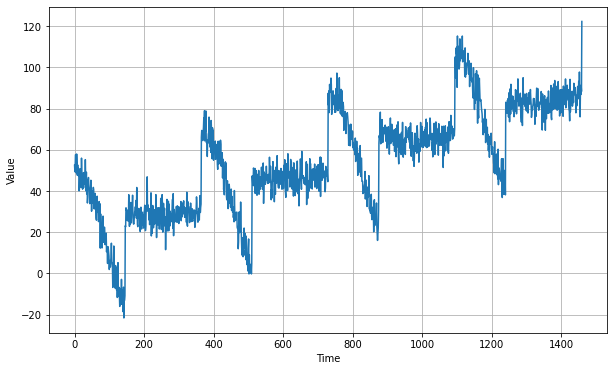

In [6]:
# it contains 1,461 data points that has trend, seasonality, and noise.

# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

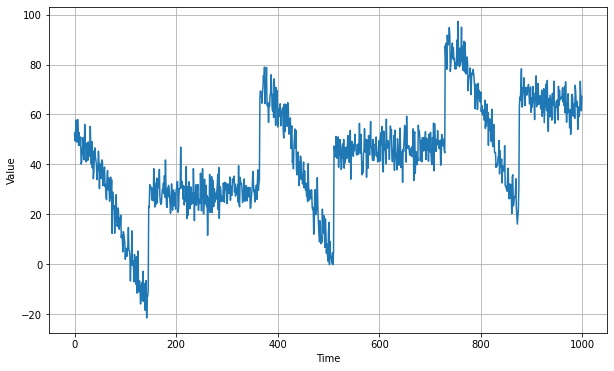

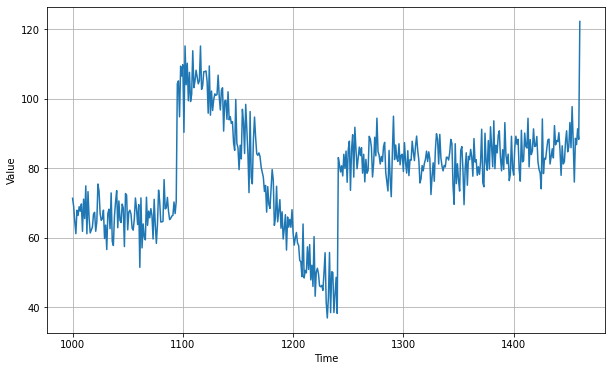

In [7]:
# split the data and plot the train and validation sets

# Define the split time
split_time = 1000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

# Plot the train set
plot_series(time_train, x_train)

# Plot the validation set
plot_series(time_valid, x_valid)

Prepare the data(features and labels).

In [8]:
# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Generates dataset windows

    Args:
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the feature
      batch_size (int) - the batch size
      shuffle_buffer(int) - buffer size to use for the shuffle method

    Returns:
      dataset (TF Dataset) - TF Dataset containing time windows
    """
  
    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))  # there is window_size+1 to indicate that you're taking the next point as the label. For example, the first 20 points will be the feature so the 21st point will be the label

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [9]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# Print properties of a single batch
for windows in dataset.take(1):
  print(f'data type: {type(windows)}')
  print(f'number of elements in the tuple: {len(windows)}')
  print(f'shape of first element: {windows[0].shape}')
  print(f'shape of second element: {windows[1].shape}')

data type: <class 'tuple'>
number of elements in the tuple: 2
shape of first element: (32, 20)
shape of second element: (32,)


Build and train the model.

In [10]:
# Model 1

# Build the single layer neural network
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

# Print the initial layer weights
print("Layer weights: \n {} \n".format(l0.get_weights()))

# Print the model summary
model.summary()

# Set the training parameters
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

# Train the model
model.fit(dataset,epochs=100)


Layer weights: 
 [array([[-0.43944275],
       [-0.22769773],
       [-0.01318365],
       [-0.31268942],
       [ 0.40304446],
       [ 0.39891833],
       [ 0.01446366],
       [-0.49539927],
       [ 0.27782398],
       [-0.24418986],
       [ 0.45037138],
       [ 0.5148887 ],
       [-0.4048528 ],
       [ 0.22433573],
       [-0.2089203 ],
       [ 0.3911785 ],
       [ 0.2049619 ],
       [ 0.21608347],
       [ 0.4027285 ],
       [ 0.24412906]], dtype=float32), array([0.], dtype=float32)] 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
31/31 [==============================] - 1s 2ms/step - loss: 212.2481
E

In [11]:
# Print the final layer weights
print("Layer weights {}".format(l0.get_weights()))

Layer weights [array([[-0.05498426],
       [-0.00048451],
       [ 0.05911979],
       [-0.07407138],
       [ 0.07826309],
       [ 0.06282794],
       [-0.01706163],
       [-0.08359617],
       [ 0.03107759],
       [-0.03348278],
       [ 0.05045781],
       [ 0.06370984],
       [-0.12523296],
       [ 0.06806273],
       [-0.02351121],
       [ 0.10251433],
       [ 0.02789281],
       [ 0.15337451],
       [ 0.29160547],
       [ 0.437173  ]], dtype=float32), array([0.01549132], dtype=float32)]


If you inspect it closely, you will see that the first array has 20 values in it, and the secondary has only one value. This is because the network has learned a linear regression to fit the values as best as they can. So each of the values in the first array can be seen as the weights for the 20 values in x, and the value for the second array is the b value.

Prediction and evaluation.

With the training finished, you can now measure the performance of your model. You can generate a model prediction by passing a batch of data windows. If you will be slicing a window from the original series array, you will need to add a batch dimension before passing it to the model. That can be done by indexing with the np.newaxis constant or using the np.expand_dims() method.

In [12]:
# Shape of the first 20 data points slice
print(f'shape of series[0:20]: {series[0:20].shape}')

# Shape after adding a batch dimension
print(f'shape of series[0:20][np.newaxis]: {series[0:20][np.newaxis].shape}')

# Shape after adding a batch dimension (alternate way)
print(f'shape of series[0:20][np.newaxis]: {np.expand_dims(series[0:20], axis=0).shape}')

# Sample model prediction
print(f'model prediction: {model.predict(series[0:20][np.newaxis])}')

shape of series[0:20]: (20,)
shape of series[0:20][np.newaxis]: (1, 20)
shape of series[0:20][np.newaxis]: (1, 20)
1/1 [==============================] - 0s 71ms/step
model prediction: [[42.93671]]


To compute the metrics, you will want to generate model predictions for your validation set. Remember that this set refers to points at index 1000 to 1460 of the entire series. You will need to code the steps to generate those from your model. The cell below demonstrates one way of doing that.

Basically, it feeds the entire series to your model 20 points at a time and append all results to a forecast list. It will then slice the points that corresponds to the validation set.

The slice index below is split_time - window_size: because the forecast list is smaller than the series by 20 points (i.e. the window size). Since the window size is 20, the first data point in the forecast list corresponds to the prediction for time at index 20. You cannot make predictions at index 0 to 19 because those are smaller than the window size. Thus, when you slice with split_time - window_size:, you will be getting the points at the time indices that aligns with those in the validation set.

In [13]:
# Initialize a list
forecast = []

# Use the model to predict data points per window size
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

# Slice the points that are aligned with the validation set
forecast = forecast[split_time - window_size:]

# Compare number of elements in the predictions and the validation set
print(f'length of the forecast list: {len(forecast)}')
print(f'shape of the validation set: {x_valid.shape}')

1/1 [==============================] - 0s 14ms/step
length of the forecast list: 461
shape of the validation set: (461,)


To visualize the results, you will need to convert the predictions to a form that the plot_series() utility function accepts. That involves converting the list to a numpy array and dropping the single dimensional axes.

shape after converting to numpy array: (461, 1, 1)
shape after squeezing: (461,)


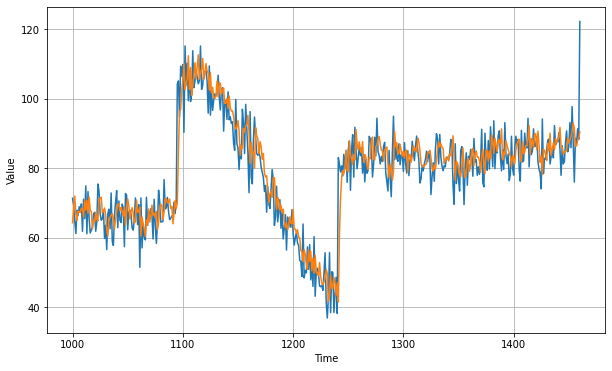

In [14]:
# Preview shapes after using the conversion and squeeze methods
print(f'shape after converting to numpy array: {np.array(forecast).shape}')
print(f'shape after squeezing: {np.array(forecast).squeeze().shape}')

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Overlay the results with the validation set
plot_series(time_valid, (x_valid, results))

In [15]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

46.42001
5.1324553


In [16]:
# Model 2 

# Build a NN model
model_baseline = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

# Print the model summary
model_baseline.summary()

# Set the training parameters
model_baseline.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9))

# Train the model
model_baseline.fit(dataset,epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
31/31 [==============================] - 0s 2ms/step - loss: 86.5015
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 79.7473
Epoch 3/100
31/31 [==============================] - 1s 21ms/step - loss: 77.2163
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 74.

We can get some predictions and visualize it as before. Since the network is deeper, the predictions might go slower so you may want to minimize unnecessary computations. Remember the model generating predictions using the entire series data. That resulted in 1,441 points in the forecast list then you sliced the 461 points that aligns with the validation set using forecast = forecast[split_time - window_size:]. We can make this process faster by just generating 461 points right from the start. That way, you don't waste time predicting points that will just be thrown away later. The code below will do just that. It will just get the points needed from the original series before calling the predict() method. With that, all predictions will align with the validation set already and the for-loop will run for only 461 times instead of 1,441.

1/1 [==============================] - 0s 16ms/step


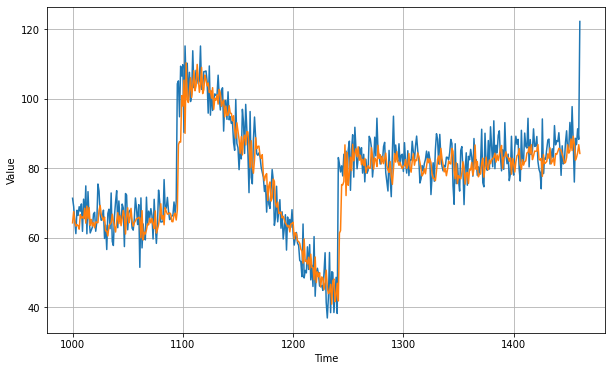

In [17]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_baseline.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [18]:
# Compute the metrics
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

47.65622
5.0840774


Wouldn't it be nice if we could pick the optimal learning rate instead of the one that we chose? We might learn more efficiently and build a better model. Now let's look at the below technique:

Learning rate tuning: we will declare a learning rate scheduler callback. This will allow you to dynamically set the learning rate based on the epoch number during training. As shown below, you will pass a lambda function to declare the value of the learning rate. It will start at 1e-8 at epoch 0 and is scaled by 10**(epoch / 20) as the training goes on.

In [19]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [20]:
# Model 3

# Build the Model
model_tune = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 1s 5ms/step - loss: 1648.6211 - lr: 1.0000e-08
Epoch 2/100
31/31 [==============================] - 1s 1ms/step - loss: 1096.1958 - lr: 1.1220e-08
Epoch 3/100
31/31 [==============================] - 1s 19ms/step - loss: 668.2967 - lr: 1.2589e-08
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 407.5546 - lr: 1.4125e-08
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 263.2745 - lr: 1.5849e-08
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 180.6786 - lr: 1.7783e-08
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 134.6824 - lr: 1.9953e-08
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 112.0515 - lr: 2.2387e-08
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 102.2163 - lr: 2.5119e-08
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 98.7577 - lr: 2.8184e-08
Epoch 1

(1e-08, 0.001, 0.0, 300.0)

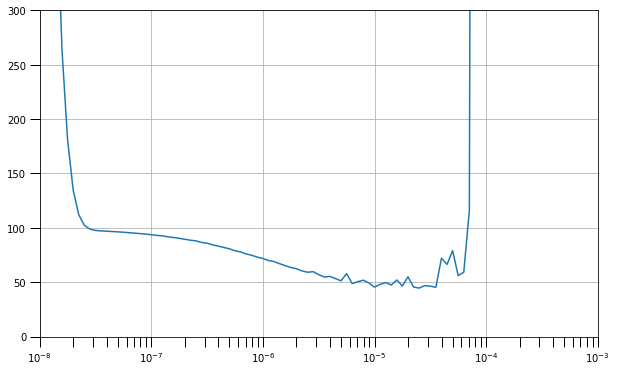

In [21]:
# plot the last per epoch against the learning rate per epoch

# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 300])

The generated graph above shows the values of the range of learning rates that leads to lower losses (i.e. sloping downward) and also which ones cause the training to become unstable (i.e. jagged edges and pointing upwards). The y-axis shows us the loss for that epoch and the x-axis shows us the learning rate. In general, we will want to pick a point in a downward slope. That means the network is still learning at that point and is stable. Choosing close to the minimum point of the graph will make the training converge to that loss value quicker(try to pick the lowest point of the curve where it's still relatively stable like this, and that's right around 4 times 10 to the -6):  

In [22]:
# Model 4

# Build the model
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

# Set the optimizer with the tuned learning rate
optimizer = tf.keras.optimizers.SGD(learning_rate=4e-6, momentum=0.9)

# Set the training parameters
model_tune.compile(loss="mse", optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100)

Epoch 1/100
31/31 [==============================] - 1s 13ms/step - loss: 201.6922
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 109.1240
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 93.3775
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 82.4204
Epoch 5/100
31/31 [==============================] - 1s 41ms/step - loss: 75.1551
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 71.3865
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 63.4505
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 61.7871
Epoch 9/100
31/31 [==============================] - 1s 18ms/step - loss: 57.3251
Epoch 10/100
31/31 [==============================] - 1s 7ms/step - loss: 56.5303
Epoch 11/100
31/31 [==============================] - 0s 2ms/step - loss: 55.1512
Epoch 12/100
31/31 [==============================] - 0s 2ms/step - loss: 53.1724
Epoch 13/100
31/31 [

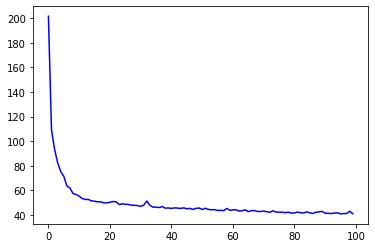

In [23]:
# Plot the loss
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()

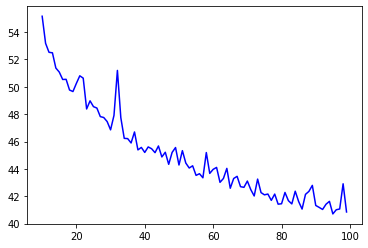

In [24]:
# Plot all but the first 10
loss = history.history['loss']
epochs = range(10, len(loss))
plot_loss = loss[10:]
plt.plot(epochs, plot_loss, 'b', label='Training Loss')
plt.show()

Predictions and evaluation.

1/1 [==============================] - 0s 17ms/step


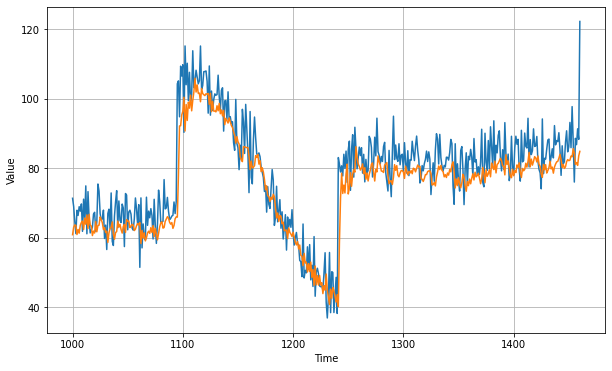

In [25]:
# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model_tune.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [26]:
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

56.600895
5.5824575


## Example 5. Training RNNs with generated Time Series Data.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# helper functions

def plot_series(time, series, format="-", start=0, end=None):

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    
    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

def trend(time, slope=0):

    # Compute the linear series given the slope
    series = slope * time

    return series

def seasonal_pattern(season_time):

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
    
    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):

    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

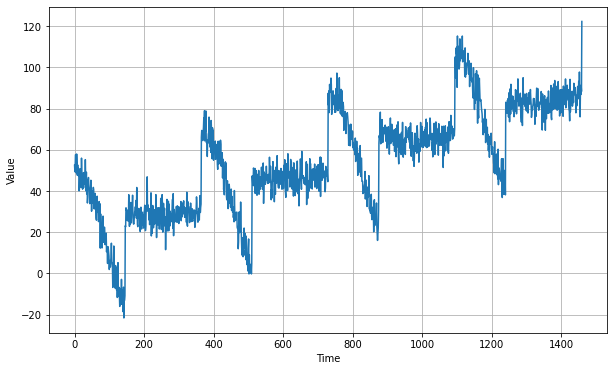

In [3]:
# generate synthetic data

# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

In [4]:
# prepare the data

# Define the split time
split_time = 1000

# Get the train set 
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

In [5]:
# prepare features and labels

# Parameters
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [6]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# Print shapes of feature and label
for window in dataset.take(1):
  print(f'shape of feature: {window[0].shape}')
  print(f'shape of label: {window[1].shape}')

shape of feature: (32, 20)
shape of label: (32,)


Model 1: simple RNNs.

In [7]:
# Build the Model
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model_tune.summary()

# Set the learning rate scheduler in order to tune the learning rate
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 20, 1)             0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 20, 40)            1680      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
 lambda_1 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
31/31 [==============================] - 1

Lambda layer: allows us to perform arbitrary operations to effectively expand the functionality of TensorFlow's keras, and we can do this within the model definition itself.

The Huber function is a loss function that's less sensitive to outliers and as this data can get a little bit noisy, it's worth giving it a shot.

(1e-08, 0.001, 0.0, 50.0)

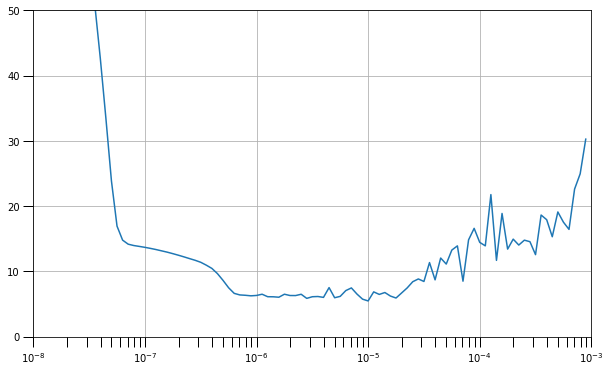

In [8]:
# choose the optimal learning rate

# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 50])

(1e-07, 0.0001, 0.0, 20.0)

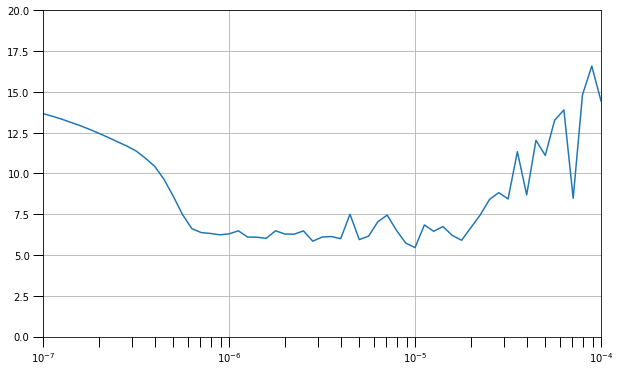

In [9]:
# change the boundaries of the graph if you want to zoom in

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-7, 1e-4, 0, 20])

In [10]:
# pick the best learning rate from the above graph and retrain a new model
# declare the model again and train with the learning rate you picked. It is set to 1e-6

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate
learning_rate = 1e-6

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(dataset,epochs=100)

Epoch 1/100
31/31 [==============================] - 7s 184ms/step - loss: 46.8834 - mae: 47.3803
Epoch 2/100
31/31 [==============================] - 3s 86ms/step - loss: 18.1689 - mae: 18.6621
Epoch 3/100
31/31 [==============================] - 2s 57ms/step - loss: 14.9743 - mae: 15.4668
Epoch 4/100
31/31 [==============================] - 2s 70ms/step - loss: 13.6820 - mae: 14.1738
Epoch 5/100
31/31 [==============================] - 1s 35ms/step - loss: 12.7909 - mae: 13.2802
Epoch 6/100
31/31 [==============================] - 1s 43ms/step - loss: 11.9922 - mae: 12.4808
Epoch 7/100
31/31 [==============================] - 2s 62ms/step - loss: 11.0985 - mae: 11.5875
Epoch 8/100
31/31 [==============================] - 3s 84ms/step - loss: 10.4004 - mae: 10.8916
Epoch 9/100
31/31 [==============================] - 2s 51ms/step - loss: 9.7818 - mae: 10.2736
Epoch 10/100
31/31 [==============================] - 3s 81ms/step - loss: 9.2149 - mae: 9.7039
Epoch 11/100
31/31 [===========

1/1 [==============================] - 0s 19ms/step


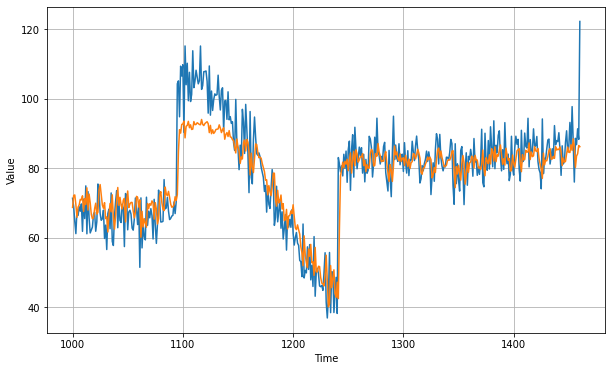

In [11]:
# model prediction

# Initialize a list
forecast = []

# Reduce the original series
forecast_series = series[split_time - window_size:]

# Use the model to predict data points per window size
for time in range(len(forecast_series) - window_size):
  forecast.append(model.predict(forecast_series[time:time + window_size][np.newaxis]))

# Convert to a numpy array and drop single dimensional axes
results = np.array(forecast).squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

<Figure size 432x288 with 0 Axes>

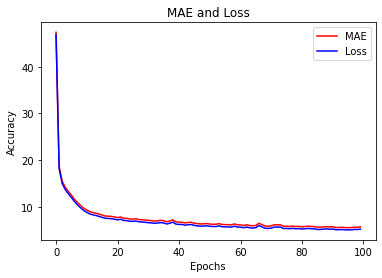

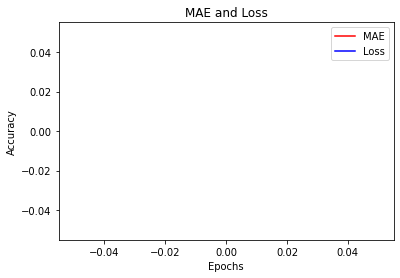

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

You can optimize this step by leveraging Tensorflow models' capability to process batches. Instead of running the for-loop above which processes a single window at a time, you can pass in an entire batch of windows and let the model process that in parallel.

The function below does just that. You will notice that it almost mirrors the windowed_dataset() function but it does not shuffle the windows. That's because we want the output to be in its proper sequence so we can compare it properly to the validation set.

In [13]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    
    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)
    
    # Get predictions on the entire dataset
    forecast = model.predict(dataset)
    
    return forecast

15/15 [==============================] - 0s 8ms/step


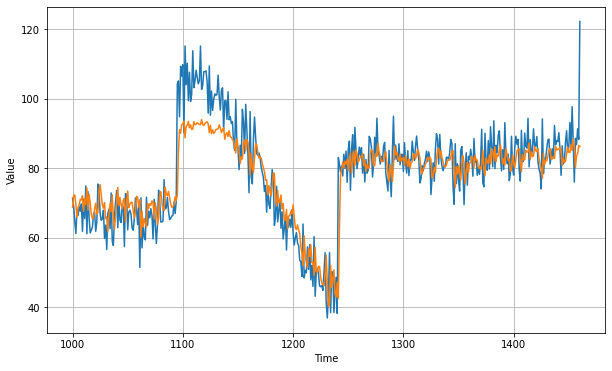

In [14]:
# Reduce the original series
forecast_series = series[split_time - window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [15]:
# evaluation by computing the MSE and MAE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

59.61012
5.748645


Model 2: LSTMs.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 20, 1)             0         
                                                                 
 bidirectional (Bidirectiona  (None, 20, 64)           8704      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
 lambda_5 (Lambda)           (None, 1)                 0         
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-trai

(1e-08, 0.001, 0.0, 30.0)

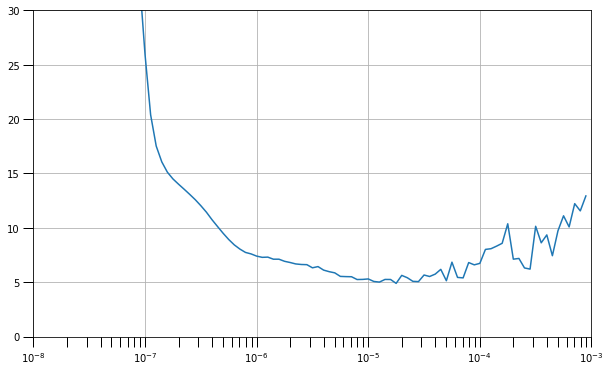

In [16]:
# Build the Model
model_tune = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Print the model summary
model_tune.summary()

# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model_tune.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model_tune.fit(dataset, epochs=100, callbacks=[lr_schedule])

# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 30])

In [17]:
# Reset states generated by Keras and retrain with the best learning rate
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate
learning_rate = 2e-6

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(dataset,epochs=100)

Epoch 1/100
31/31 [==============================] - 8s 19ms/step - loss: 9.7948 - mae: 10.2804
Epoch 2/100
31/31 [==============================] - 1s 43ms/step - loss: 7.6203 - mae: 8.1037
Epoch 3/100
31/31 [==============================] - 1s 30ms/step - loss: 7.2569 - mae: 7.7372
Epoch 4/100
31/31 [==============================] - 1s 31ms/step - loss: 7.0524 - mae: 7.5315
Epoch 5/100
31/31 [==============================] - 2s 68ms/step - loss: 6.8277 - mae: 7.3068
Epoch 6/100
31/31 [==============================] - 1s 22ms/step - loss: 6.7414 - mae: 7.2195
Epoch 7/100
31/31 [==============================] - 1s 11ms/step - loss: 6.5271 - mae: 7.0028
Epoch 8/100
31/31 [==============================] - 1s 20ms/step - loss: 6.4839 - mae: 6.9634
Epoch 9/100
31/31 [==============================] - 1s 18ms/step - loss: 6.3096 - mae: 6.7906
Epoch 10/100
31/31 [==============================] - 2s 44ms/step - loss: 6.1469 - mae: 6.6263
Epoch 11/100
31/31 [============================

15/15 [==============================] - 1s 7ms/step


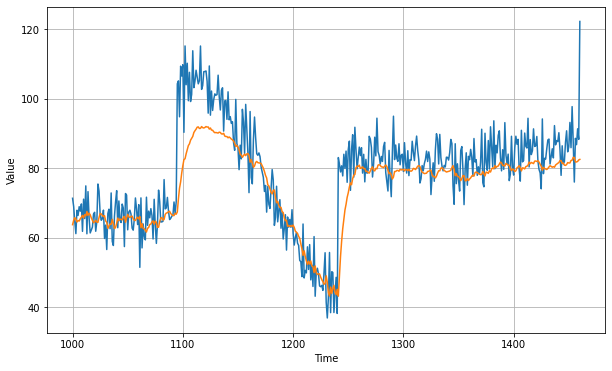

In [18]:
# model's prediction

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

In [19]:
# model's evaluation

# Compute the MSE and MAE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

76.77651
6.289822


<Figure size 432x288 with 0 Axes>

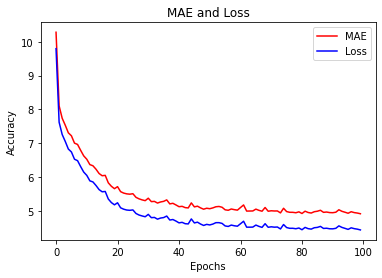

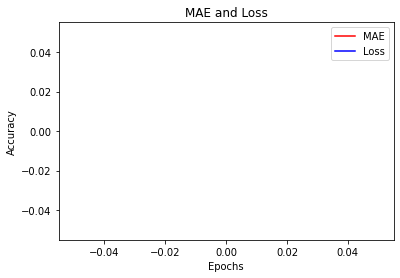

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

Including a validation set while training.

In [21]:
# Generate data windows of the validation set
val_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [22]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

# Set the learning rate
learning_rate = 2e-6

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(dataset,epochs=100, validation_data=val_set)

Epoch 1/100
31/31 [==============================] - 9s 97ms/step - loss: 13.7173 - mae: 14.2099 - val_loss: 17.5581 - val_mae: 18.0546
Epoch 2/100
31/31 [==============================] - 0s 13ms/step - loss: 6.4865 - mae: 6.9632 - val_loss: 10.0489 - val_mae: 10.5366
Epoch 3/100
31/31 [==============================] - 1s 29ms/step - loss: 6.0670 - mae: 6.5521 - val_loss: 9.7294 - val_mae: 10.2179
Epoch 4/100
31/31 [==============================] - 1s 31ms/step - loss: 5.8975 - mae: 6.3789 - val_loss: 8.7069 - val_mae: 9.1906
Epoch 5/100
31/31 [==============================] - 1s 31ms/step - loss: 5.8042 - mae: 6.2862 - val_loss: 8.8469 - val_mae: 9.3335
Epoch 6/100
31/31 [==============================] - 1s 30ms/step - loss: 5.7178 - mae: 6.1975 - val_loss: 8.0738 - val_mae: 8.5607
Epoch 7/100
31/31 [==============================] - 1s 13ms/step - loss: 5.6079 - mae: 6.0871 - val_loss: 6.6378 - val_mae: 7.1206
Epoch 8/100
31/31 [==============================] - 1s 17ms/step - l

Model 3: Conv1D and LSTMs.

We use the same data as in above examples.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 64)            256       
                                                                 
 lstm (LSTM)                 (None, 20, 64)            33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
 lambda (Lambda)             (None, 1)                 0         
                                                                 
Total params: 66,369
Trainable params: 66,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
31/31 [==============================] -

(1e-08, 0.001, 0.0, 50.0)

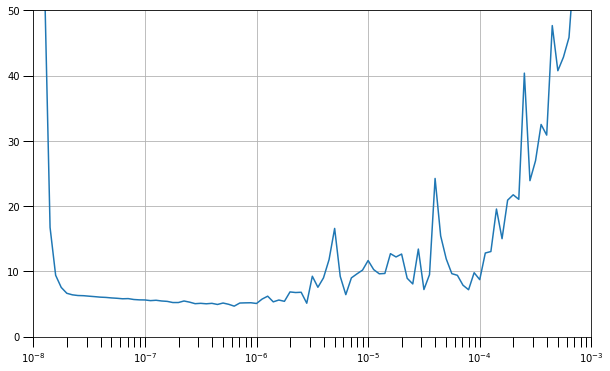

In [23]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[window_size, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

# Print the model summary
model.summary()

# Get initial weights
init_weights = model.get_weights()

# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 50])

In [24]:
# choose the best learning rate and retrain using callback on the validation set

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

# Set the learning rate
learning_rate = 1e-7

# Generate data windows from the validation set
val_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when a certain metric is met

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the validation set MAE
    if(logs.get('val_mae') < 5.2):

      # Stop if threshold is met
      print("\nRequired val MAE is met so cancelling training!")
      self.model.stop_training = True

# Instantiate the class
callbacks = myCallback()

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model
history = model.fit(dataset, epochs=500, validation_data=val_set, callbacks=[callbacks])

Epoch 1/500
      2/Unknown - 4s 984ms/step - loss: 139.6157 - mae: 140.1157

31/31 [==============================] - 6s 99ms/step - loss: 64.4757 - mae: 64.9744 - val_loss: 9.8668 - val_mae: 10.3535
Epoch 2/500
31/31 [==============================] - 0s 10ms/step - loss: 10.4303 - mae: 10.9222 - val_loss: 14.5484 - val_mae: 15.0407
Epoch 3/500
31/31 [==============================] - 0s 9ms/step - loss: 6.5253 - mae: 7.0065 - val_loss: 9.4170 - val_mae: 9.9043
Epoch 4/500
31/31 [==============================] - 1s 28ms/step - loss: 6.0997 - mae: 6.5809 - val_loss: 7.7907 - val_mae: 8.2776
Epoch 5/500
31/31 [==============================] - 0s 10ms/step - loss: 5.8558 - mae: 6.3377 - val_loss: 7.3786 - val_mae: 7.8684
Epoch 6/500
31/31 [==============================] - 0s 11ms/step - loss: 5.7346 - mae: 6.2111 - val_loss: 6.7780 - val_mae: 7.2549
Epoch 7/500
31/31 [==============================] - 1s 30ms/step - loss: 5.6443 - mae: 6.1203 - val_loss: 6.8987 - val_mae: 7.3844
Epoch 8/500
31/31 [==============================] - 0s 9ms/step - loss: 5.5782 - 

<Figure size 432x288 with 0 Axes>

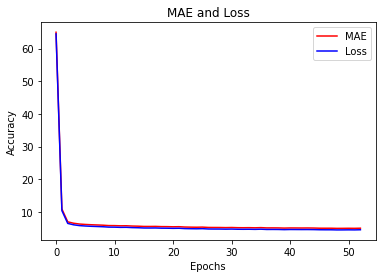

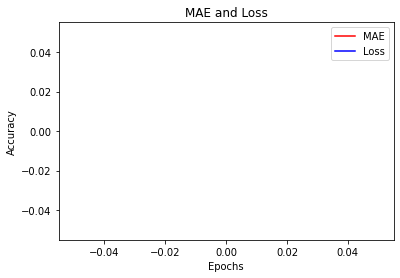

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

15/15 [==============================] - 1s 7ms/step


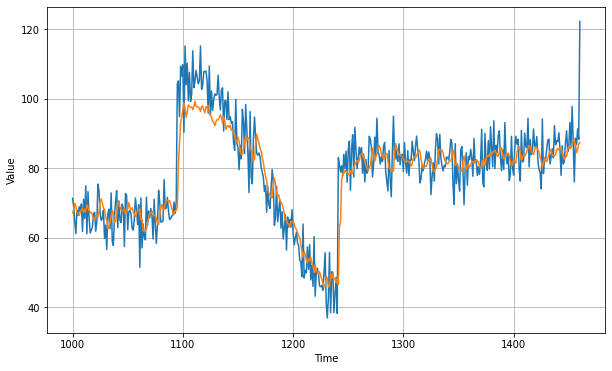

45.87932
5.0500264


In [26]:
# predictions and evaluation

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

## Compute the MAE and MSE
print(tf.keras.metrics.mean_squared_error(x_valid, results).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

## Example 6. Training RNNs on real-world Time Series Data.

In [27]:
# get the data Sunspots.csv
!gdown --id 1bLnqPgwoSh6rHz_DKDdDeQyAyl8_nqT5

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bLnqPgwoSh6rHz_DKDdDeQyAyl8_nqT5
To: /content/Sunspots.csv
100% 70.8k/70.8k [00:00<00:00, 83.1MB/s]


In [28]:
# a helper function for plotting
import numpy as np
import matplotlib.pyplot as plt

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

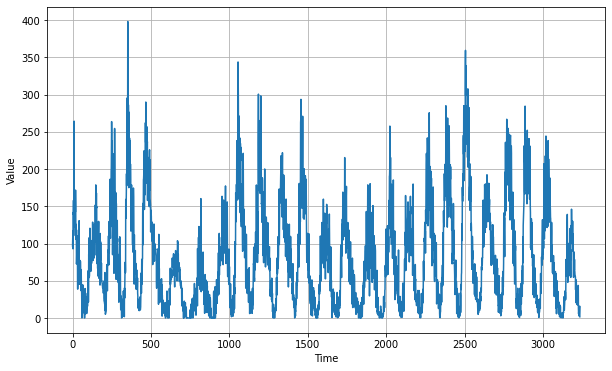

In [29]:
# read the data
import csv
time_step = []
sunspots = []

with open('./Sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

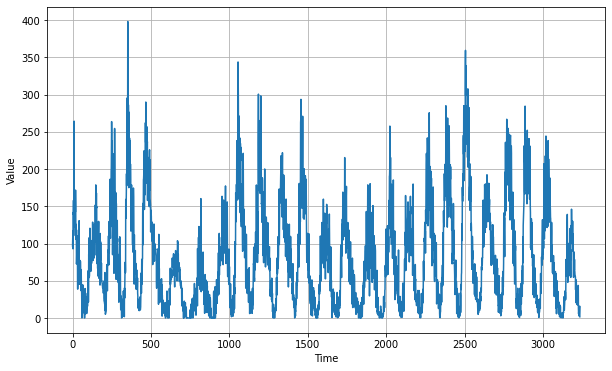

In [30]:
# of course data to np.arrays
series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [31]:
# split the data
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [32]:
# helper functions

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [33]:
# build and train the model

window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# train for 100 epochs first to find the optimal learning rate
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(3000,)
Epoch 1/100
12/12 [==============================] - 4s 99ms/step - loss: 220.4473 - mae: 220.9467 - lr: 1.0000e-08
Epoch 2/100
12/12 [==============================] - 1s 29ms/step - loss: 212.8631 - mae: 213.3626 - lr: 1.1220e-08
Epoch 3/100
12/12 [==============================] - 2s 85ms/step - loss: 198.9445 - mae: 199.4442 - lr: 1.2589e-08
Epoch 4/100
12/12 [==============================] - 1s 76ms/step - loss: 170.9813 - mae: 171.4812 - lr: 1.4125e-08
Epoch 5/100
12/12 [==============================] - 1s 31ms/step - loss: 146.7153 - mae: 147.2152 - lr: 1.5849e-08
Epoch 6/100
12/12 [==============================] - 1s 42ms/step - loss: 135.1562 - mae: 135.6560 - lr: 1.7783e-08
Epoch 7/100
12/12 [==============================] - 1s 48ms/step - loss: 125.1155 - mae: 125.6154 - lr: 1.9953e-08
Epoch 8/100
12/12 [=

(1e-08, 0.0001, 0.0, 60.0)

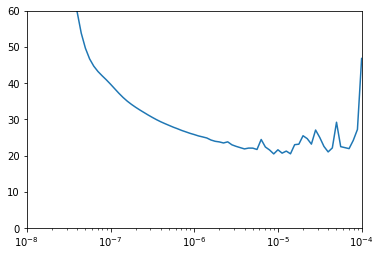

In [34]:
# plot lr to find the best one
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [35]:
# retrain a new model with the best lr you found
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
30/30 [==============================] - 5s 75ms/step - loss: 36.9271 - mae: 37.4230
Epoch 2/500
30/30 [==============================] - 1s 43ms/step - loss: 24.8928 - mae: 25.3873
Epoch 3/500
30/30 [==============================] - 2s 60ms/step - loss: 22.4110 - mae: 22.9046
Epoch 4/500
30/30 [==============================] - 1s 18ms/step - loss: 21.0505 - mae: 21.5438
Epoch 5/500
30/30 [==============================] - 2s 52ms/step - loss: 20.5015 - mae: 20.9944
Epoch 6/500
30/30 [==============================] - 1s 37ms/step - loss: 20.3321 - mae: 20.8253
Epoch 7/500
30/30 [==============================] - 1s 27ms/step - loss: 19.8536 - mae: 20.3463
Epoch 8/500
30/30 [==============================] - 2s 36ms/step - loss: 19.2926 - mae: 19.7853
Epoch 9/500
30/30 [==============================] - 1s 36ms/step - loss: 19.1297 - mae: 19.6222
Epoch 10/500
30/30 [==============================] - 1s 18ms/step - loss: 20.1635 - mae: 20.6566
Epoch 11/500
30/30 [=========

100/100 [==============================] - 2s 18ms/step
[ 1.16059616e+02  1.14581314e+02  1.18287399e+02  1.23744843e+02
  1.16582466e+02  1.37572784e+02  1.66312729e+02  1.51700363e+02
  1.78570694e+02  1.43924088e+02  1.35687576e+02  1.35752289e+02
  1.49504578e+02  1.58170486e+02  1.67601990e+02  1.63907471e+02
  1.46871262e+02  1.60578796e+02  1.57418427e+02  1.71360641e+02
  1.64021469e+02  1.70817108e+02  1.70708954e+02  1.71337372e+02
  1.49820404e+02  1.53898041e+02  1.43913284e+02  1.63617630e+02
  1.44123413e+02  1.38324585e+02  1.75067612e+02  1.22432770e+02
  1.34747833e+02  1.58840317e+02  1.30830124e+02  1.60330139e+02
  1.53451111e+02  1.36971252e+02  1.44921829e+02  1.39844223e+02
  1.64613922e+02  1.48343353e+02  1.33937408e+02  1.42930054e+02
  1.67689865e+02  1.68732956e+02  1.56396454e+02  1.54377151e+02
  1.37670105e+02  1.31314240e+02  1.07897614e+02  1.23478607e+02
  1.02809753e+02  8.87972946e+01  1.11654602e+02  1.12106598e+02
  1.01569511e+02  9.15802231e+01  

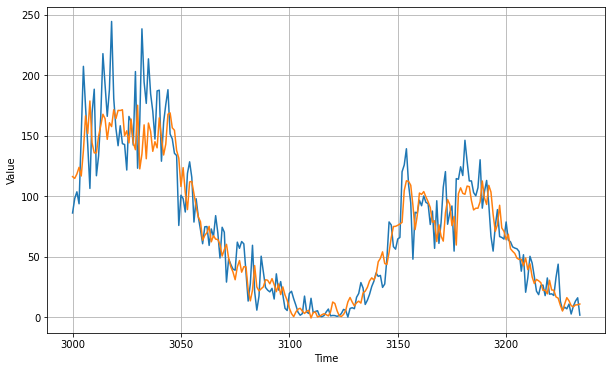

In [37]:
# predictions
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

# plot predictions
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

# print the prediction
print(rnn_forecast)

In [38]:
# evaluation
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

15.814141

<Figure size 432x288 with 0 Axes>

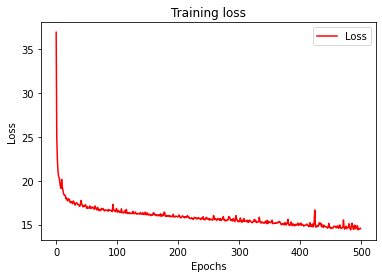

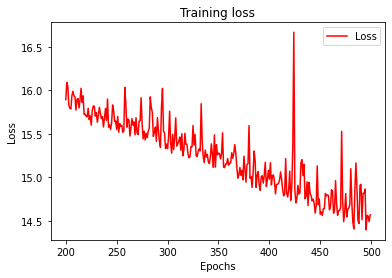

<Figure size 432x288 with 0 Axes>

In [39]:
# plotting the results
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [ ]:
# uncomment and try all the above process with this model with only Dense layers for fun !!

#model = tf.keras.models.Sequential([
#    tf.keras.layers.Dense(20, input_shape=[window_size], activation="relu"), 
#    tf.keras.layers.Dense(10, activation="relu"),
#    tf.keras.layers.Dense(1)
#])